In [3]:
# prepare data for lstm
from pandas import read_pickle
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy as np

import matplotlib.pyplot as plt

In [16]:
def series_to_supervised(data, n_in=1, dropna=True):
    """ Frame a time series as a supervised learning dataset.
    Arguments:
        Data: Sequence of oberservation as a list or NumPy array.
        n_in: Number of lag oberservation as input (X).
        n_out: Number of observations as output(y).
        dropna: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series frames for supervised learning.
    """

    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ... t-1)
    for i in range (n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    

    # forecast sequence (t, t+1, ... t+n)
    for i in range (0, n_out):
        cols,aooend(df.shift(-i))
        if i == 0:
            name += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

# put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
# load dataset 
dataset = read_pickle("TRAIN LSTM Pickle Hourly.pkl")
dataset = dataset.drop("Neerslag Appelweg (radar Hydronet)", axis =1)
dataset = dataset.drop("Overstort 624 (-1,00)", axis=1)
dataset = dataset.drop("Overstort 623 (-1,10)", axis=1)
print ("===============================================\ndata read")
print(dataset[0:20])

data read
                 Neerslag Buikslotermeerplein (radar Hydronet)  BBB riool
           Tijd                                                          
2016-01-02 9                                              0.00     -2.526
           10                                             0.00     -2.526
           11                                             0.00     -2.526
           12                                             0.00     -2.526
           13                                             0.00     -2.526
           14                                             0.00     -2.526
           15                                             0.00     -2.526
           16                                             0.24     -2.526
           17                                             0.21     -2.526
           18                                             0.16     -2.526
           19                                             0.00     -2.526
           20               

In [18]:
values = dataset.values
# ensure all data is float
values = values.astype('float32')
print("=====================================\nvalues as float32")
print(values[0:20])

values as float32
[[ 0.    -2.526]
 [ 0.    -2.526]
 [ 0.    -2.526]
 [ 0.    -2.526]
 [ 0.    -2.526]
 [ 0.    -2.526]
 [ 0.    -2.526]
 [ 0.24  -2.526]
 [ 0.21  -2.526]
 [ 0.16  -2.526]
 [ 0.    -2.526]
 [ 0.05  -2.526]
 [ 0.18  -2.526]
 [ 0.22  -2.526]
 [ 0.    -2.526]
 [ 0.11  -2.526]
 [ 0.18  -2.526]
 [ 0.06  -2.526]
 [ 0.    -2.526]
 [ 0.    -2.526]]


In [19]:
# split into input and outputs
values_X, values_y = values[:, :-1], values[:, -1]

In [20]:
print("======================================\nvalues X:")
print(values_X[0:20])

values X:
[[0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.24]
 [0.21]
 [0.16]
 [0.  ]
 [0.05]
 [0.18]
 [0.22]
 [0.  ]
 [0.11]
 [0.18]
 [0.06]
 [0.  ]
 [0.  ]]


In [21]:
print("========================\vnvalues y:")
print(values_y[:20])

========================nvalues y:
[-2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526
 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526 -2.526]


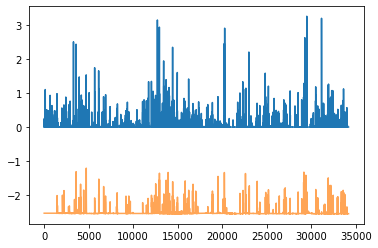

In [22]:
plt.plot(values_X, alpha=1)
plt.plot(values_y, alpha=0.7)
plt.show()